<a href="https://colab.research.google.com/github/Manikantan-S/Movie-Review-Analysis-NLP/blob/main/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import string
string.punctuation
import re



# Tools for preprocessing input data
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Movies/Test.csv')

In [4]:
data.head(15)

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
5,"I saw this film on September 1st, 2005 in Indi...",1
6,I saw a screening of this movie last night. I ...,0
7,William Hurt may not be an American matinee id...,1
8,IT IS A PIECE OF CRAP! not funny at all. durin...,0
9,I'M BOUT IT(1997)<br /><br />Developed & publi...,0


In [5]:
data.shape


(5000, 2)

In [6]:
data.isnull().sum()

text     0
label    0
dtype: int64

Text(0, 0.5, 'Count')

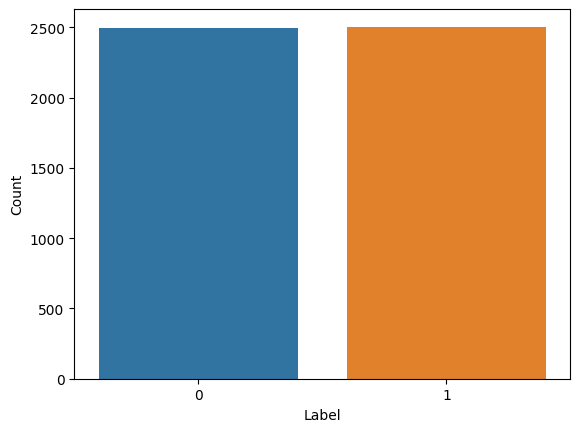

In [7]:
counts = data.label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Label')
plt.ylabel('Count')

In [8]:
#creating a function to preprocess the data
def processing(text):

    # Remove email addres
    raw_review = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', " ", text)

    # Remove URLs with 'httpaddr'
    raw_review = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', " ", raw_review)

    # Remove non-letters
    raw_review = re.sub("[^a-zA-Z]", " ", raw_review)

    # Remove numbers
    raw_review = re.sub('\d+(\.\d+)?', " ", raw_review)

    # Convert to lower case, split into individual words
    words = raw_review.lower().split()

    # Gather the list of stopwords in English Language
    stops = set(stopwords.words("english"))

    # Remove stop words and stemming the remaining words
    meaningful_words = [ps.stem(w) for w in words if not w in stops]

    # Join the tokens back into one string separated by space,
    # and return the result.
    return( " ".join( meaningful_words ))

In [9]:
clean_reviews_corpus = []
ps = PorterStemmer()

In [10]:
review_count = data['text'].size
review_count
import re

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
for i in range( 0, review_count):
    clean_reviews_corpus.append(processing(data["text"][i]))

In [13]:

print ("Original Text : \n")
data["text"][0]


Original Text : 



'I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hairy lightho

In [14]:
print ("Processed Text : \n")

clean_reviews_corpus[:1]

Processed Text : 



['alway wrote seri complet stink fest jim belushi involv heavili one day tragic happenst occur white sox game end realiz remot way side room somehow could gotten walk across room get remot even tv turn channel get walk across countri watch tv anoth state nut said decid hang tight couch take whatev fate store fate store episod show episod rememb littl except made broad gener sweep blanket judgment base zero object experienti evid noth whatsoev back opinion complet right show total crud pie belushi comed deliveri hairi lighthous foghorn women physic attract stepford elicit real feel viewer absolut reason stop run local tv station gasolin flamethrow send everi copi mutt howl back hell br br except br br except wonder comic sti ling larri joe campbel america greatest comic charact actor guy play belushi brother law andi gold good realli well asid funni job make belushi look good like tri make butt wart look good campbel pull style someon invent nobel prize comic buffooneri win everi year w

In [15]:
#prepairing vectors
cv = CountVectorizer()
data_input = cv.fit_transform(clean_reviews_corpus)
data_input = data_input.toarray()

In [16]:
#errors
data_input[0]

array([0, 0, 0, ..., 0, 0, 0])

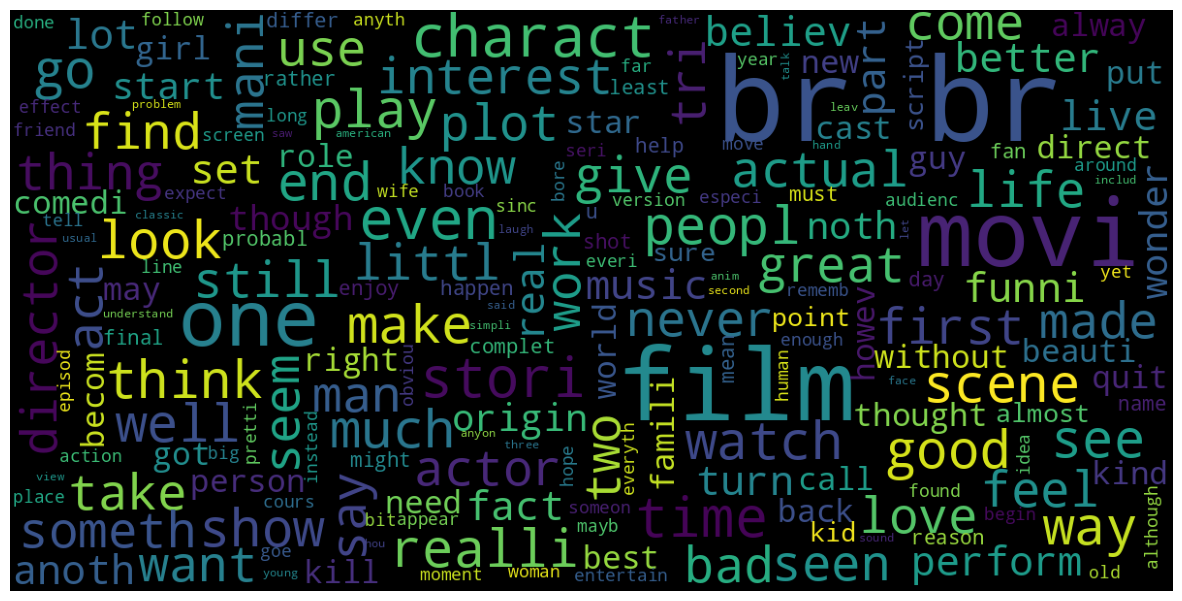

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black', stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(clean_reviews_corpus)

In [18]:
data_output = data['label']
print (data_output.value_counts())

1    2505
0    2495
Name: label, dtype: int64


<Axes: >

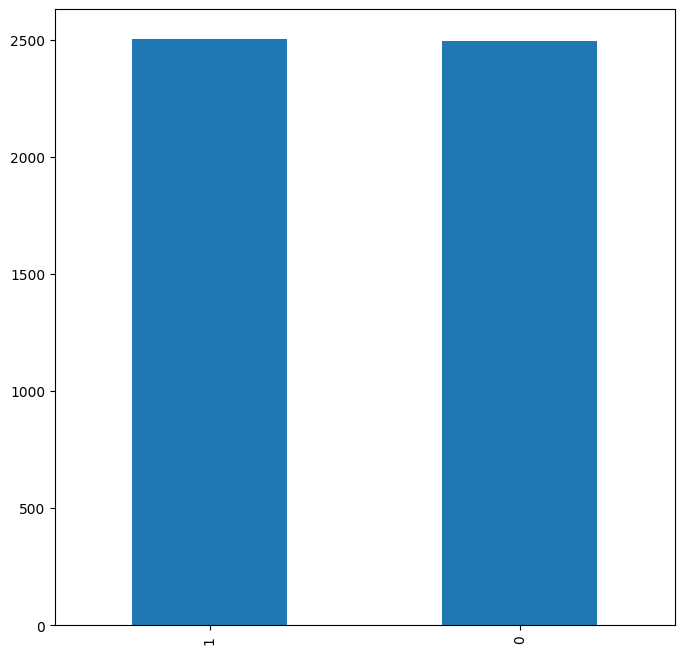

In [19]:
plt.figure(figsize = (8, 8))
data['label'].value_counts().plot.bar()

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV


train_x, test_x, train_y, test_y = train_test_split(data_input, data_output,test_size= 0.20, random_state = 0)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [22]:

model_nvb = GaussianNB()
model_nvb.fit(train_x, train_y)

model_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
model_rf.fit(train_x, train_y)

model_dt = tree.DecisionTreeClassifier()
model_dt.fit(train_x, train_y)


DecisionTreeClassifier()

In [23]:

prediction_nvb = model_nvb.predict(test_x)
prediction_rf = model_rf.predict(test_x)
prediction_dt = model_dt.predict(test_x)


In [24]:
print ("Accuracy for Naive Bayes : %0.5f \n\n" % accuracy_score(test_y, prediction_nvb))
print ("Classification Report Naive bayes: \n", classification_report(test_y, prediction_nvb))

Accuracy for Naive Bayes : 0.62100 


Classification Report Naive bayes: 
               precision    recall  f1-score   support

           0       0.60      0.70      0.64       489
           1       0.65      0.55      0.60       511

    accuracy                           0.62      1000
   macro avg       0.63      0.62      0.62      1000
weighted avg       0.63      0.62      0.62      1000



In [25]:
#random forest
print ("Accuracy for Random Forest: %0.5f \n\n" % accuracy_score(test_y, prediction_rf))
print ("Classification Report Random Forest: \n", classification_report(test_y, prediction_rf))

Accuracy for Random Forest: 0.84500 


Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       489
           1       0.83      0.88      0.85       511

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000

